In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [3]:
# Download NLTK resources (VADER)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
# Loading the dataset
file_path = "AAAI_Dataset.xlsx"
data = pd.read_excel(file_path)

In [8]:
# Displaying the first few rows
print(data.head())

   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real


In [9]:
# Initialising the VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

In [10]:
# Defining a function to calculate sentiment scores
def get_sentiment(text):
    if pd.isna(text):
        return None  # Handle NaN tweets
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'Positive'
    elif scores['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [11]:
# Appling sentiment analysis to tweets
data['sentiment'] = data['tweet'].apply(get_sentiment)

In [12]:
# Displaying the first few rows with sentiment
print(data[['tweet', 'label', 'sentiment']].head())

                                               tweet label sentiment
0  Chinese converting to Islam after realising th...  fake  Negative
1  11 out of 13 people (from the Diamond Princess...  fake  Positive
2  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake   Neutral
3  Mike Pence in RNC speech praises Donald Trump’...  fake  Positive
4  6/10 Sky's @EdConwaySky explains the latest #C...  real   Neutral


In [15]:
# Comparing sentiment trends between real and fake tweets
real_tweets = data[data['label'] == 'real']
fake_tweets = data[data['label'] == 'fake']

real_sentiment_counts = real_tweets['sentiment'].value_counts()
fake_sentiment_counts = fake_tweets['sentiment'].value_counts()

print("\nSentiment distribution in real tweets:")
print(real_sentiment_counts)

print("\nSentiment distribution in fake tweets:")
print(fake_sentiment_counts)



Sentiment distribution in real tweets:
sentiment
Positive    504
Neutral     317
Negative    299
Name: count, dtype: int64

Sentiment distribution in fake tweets:
sentiment
Negative    404
Neutral     324
Positive    292
Name: count, dtype: int64


In [16]:
# Visualising sentiment trends
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([0, 1, 2]),
 [Text(0, 0, 'Positive'), Text(1, 0, 'Neutral'), Text(2, 0, 'Negative')])

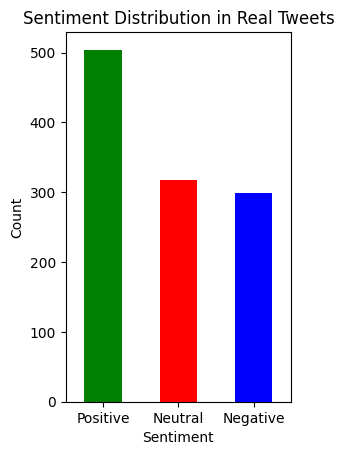

In [17]:
# Bar chart for real tweets
plt.subplot(1, 2, 1)
real_sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Real Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

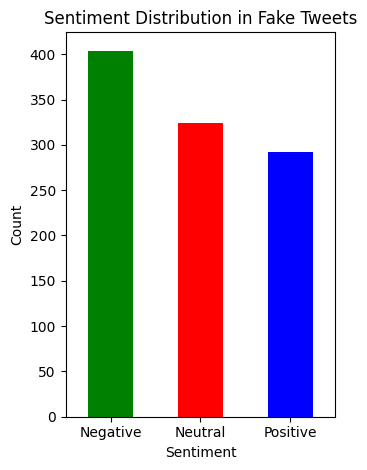

In [19]:
# Bar chart for fake tweets
plt.subplot(1, 2, 2)
fake_sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Fake Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [20]:
# Summary of Sentiment Trends
real_total = real_sentiment_counts.sum()
fake_total = fake_sentiment_counts.sum()

print(f"\nPercentage of positive tweets in real data: {100 * real_sentiment_counts.get('Positive', 0) / real_total:.2f}%")
print(f"Percentage of positive tweets in fake data: {100 * fake_sentiment_counts.get('Positive', 0) / fake_total:.2f}%")

print(f"Percentage of negative tweets in real data: {100 * real_sentiment_counts.get('Negative', 0) / real_total:.2f}%")
print(f"Percentage of negative tweets in fake data: {100 * fake_sentiment_counts.get('Negative', 0) / fake_total:.2f}%")

print(f"Percentage of neutral tweets in real data: {100 * real_sentiment_counts.get('Neutral', 0) / real_total:.2f}%")
print(f"Percentage of neutral tweets in fake data: {100 * fake_sentiment_counts.get('Neutral', 0) / fake_total:.2f}%")


Percentage of positive tweets in real data: 45.00%
Percentage of positive tweets in fake data: 28.63%
Percentage of negative tweets in real data: 26.70%
Percentage of negative tweets in fake data: 39.61%
Percentage of neutral tweets in real data: 28.30%
Percentage of neutral tweets in fake data: 31.76%


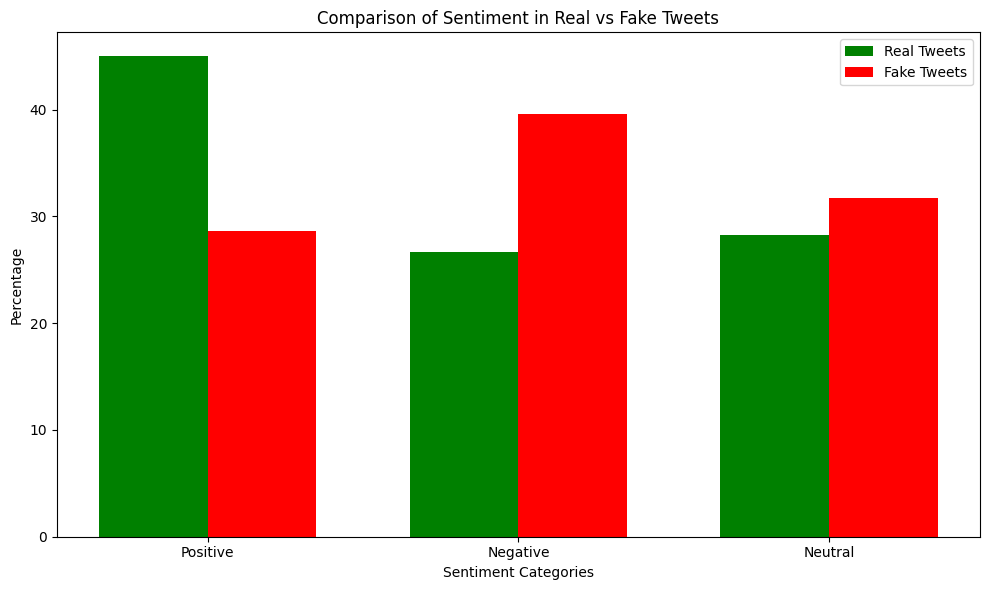

In [22]:
# Data for plotting
categories = ['Positive', 'Negative', 'Neutral']
real_percentages = [45.00, 26.70, 28.30]
fake_percentages = [28.63, 39.61, 31.76]

x = np.arange(len(categories))  # Label locations

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Width of the bars

plt.bar(x - bar_width/2, real_percentages, bar_width, label='Real Tweets', color='green')
plt.bar(x + bar_width/2, fake_percentages, bar_width, label='Fake Tweets', color='red')

# Add labels and title
plt.xlabel('Sentiment Categories')
plt.ylabel('Percentage')
plt.title('Comparison of Sentiment in Real vs Fake Tweets')
plt.xticks(x, categories)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


**Conclusions**

    Real Tweets Are More Positive:
        A higher percentage of real tweets (45%) are classified as positive compared to fake tweets (28.63%).
        This suggests that real tweets are more likely to focus on encouraging or optimistic topics, such as public health achievements, factual updates, or positive outcomes.

    Fake Tweets Are More Negative:
        Fake tweets have a significantly higher percentage of negative sentiment (39.61%) compared to real tweets (26.70%).
        This aligns with the tendency of misinformation to provoke fear, anger, or outrage, which are powerful emotional triggers that encourage sharing and engagement.

    Neutral Sentiments Are Similar:
        The percentage of neutral tweets is fairly similar in both categories (real: 28.30%, fake: 31.76%).
        This indicates that some tweets in both categories may focus on information-sharing or descriptive content without strong emotional tone.

    Emotional Manipulation in Fake Tweets:
        The higher prevalence of negative sentiment in fake tweets suggests that misinformation may be crafted to exploit emotional responses, such as anxiety or mistrust, to influence behaviour or beliefs.

    Balanced Sentiment in Real Tweets:
        Real tweets display a more balanced sentiment distribution, with substantial proportions of positive, neutral, and negative sentiments. This reflects the multifaceted nature of factual reporting, which covers good, bad, and neutral events.